In [15]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Confirm TensorFlow version
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.0


In [16]:
# Function to build custom ResNet-18 model
def build_custom_resnet18(input_shape=(32, 32, 3), num_classes=10):
    base_model = tf.keras.applications.ResNet50(weights=None, include_top=False, input_shape=input_shape)

    # Add custom layers on top of ResNet
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

# Function to build custom MobileNet model
def build_custom_mobilenet(input_shape=(32, 32, 3), num_classes=10):
    base_model = tf.keras.applications.MobileNet(weights=None, include_top=False, input_shape=input_shape)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model


In [17]:
# Load CIFAR-10 data and preprocess
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)

# Generate augmented data for training and validation
train_generator = datagen.flow(x_train, y_train, batch_size=32, subset='training')
val_generator = datagen.flow(x_train, y_train, batch_size=32, subset='validation')
print("Data loaded and generators created.")





Data loaded and generators created.


In [18]:
# Instantiate and compile ResNet-18 model
model_resnet18 = build_custom_resnet18()
model_resnet18.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [19]:
# Train ResNet-18 model
history_resnet18 = model_resnet18.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 124s 54ms/step - accuracy: 0.1425 - loss: 2.3098 - val_accuracy: 0.1881 - val_loss: 2.0310
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 49ms/step - accuracy: 0.1612 - loss: 2.1054 - val_accuracy: 0.1441 - val_loss: 2.0788
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 48ms/step - accuracy: 0.1553 - loss: 2.1057 - val_accuracy: 0.1967 - val_loss: 1.9426
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.1546 - loss: 2.0892 - val_accuracy: 0.1276 - val_loss: 2.5129
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.1490 - loss: 2.1006 - val_accuracy: 0.1995 - val_loss: 1.9633
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.1556 - loss: 2.1101 - val_accuracy: 0.1556 - val_loss: 2.1734
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.1460 - loss: 2.1592 - val_accuracy: 0.1923 - val_loss: 1.9737
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.1503

In [21]:
# Evaluate ResNet-18 model
test_loss_resnet, test_acc_resnet = model_resnet18.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy of ResNet-18: {test_acc_resnet:.2f}")


313/313 - 3s - 8ms/step - accuracy: 0.4038 - loss: 1.5637
Test Accuracy of ResNet-18: 0.40


In [24]:
# Instantiate and compile MobileNet model
model_mobilenet = build_custom_mobilenet()
model_mobilenet.compile(optimizer=SGD(learning_rate=0.01),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
print("MobileNet model instantiated and compiled.")

MobileNet model instantiated and compiled.


In [25]:
# Train MobileNet model
history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.1644 - loss: 2.2832 - val_accuracy: 0.2656 - val_loss: 1.9523
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.2882 - loss: 1.9226 - val_accuracy: 0.3410 - val_loss: 1.7512
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.3417 - loss: 1.7821 - val_accuracy: 0.3893 - val_loss: 1.6468
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.3797 - loss: 1.6980 - val_accuracy: 0.3828 - val_loss: 1.6907
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.4020 - loss: 1.6441 - val_accuracy: 0.4499 - val_loss: 1.5068
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.4226 - loss: 1.5918 - val_accuracy: 0.4349 - val_loss: 1.5305
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.4419 - loss: 1.5613 - val_accuracy: 0.4207 - val_loss: 1.6308
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.4581 -

In [26]:
# Evaluate MobileNet model
test_loss_mobilenet, test_acc_mobilenet = model_mobilenet.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy of MobileNet: {test_acc_mobilenet:.2f}")


313/313 - 1s - 4ms/step - accuracy: 0.5995 - loss: 1.1363
Test Accuracy of MobileNet: 0.60


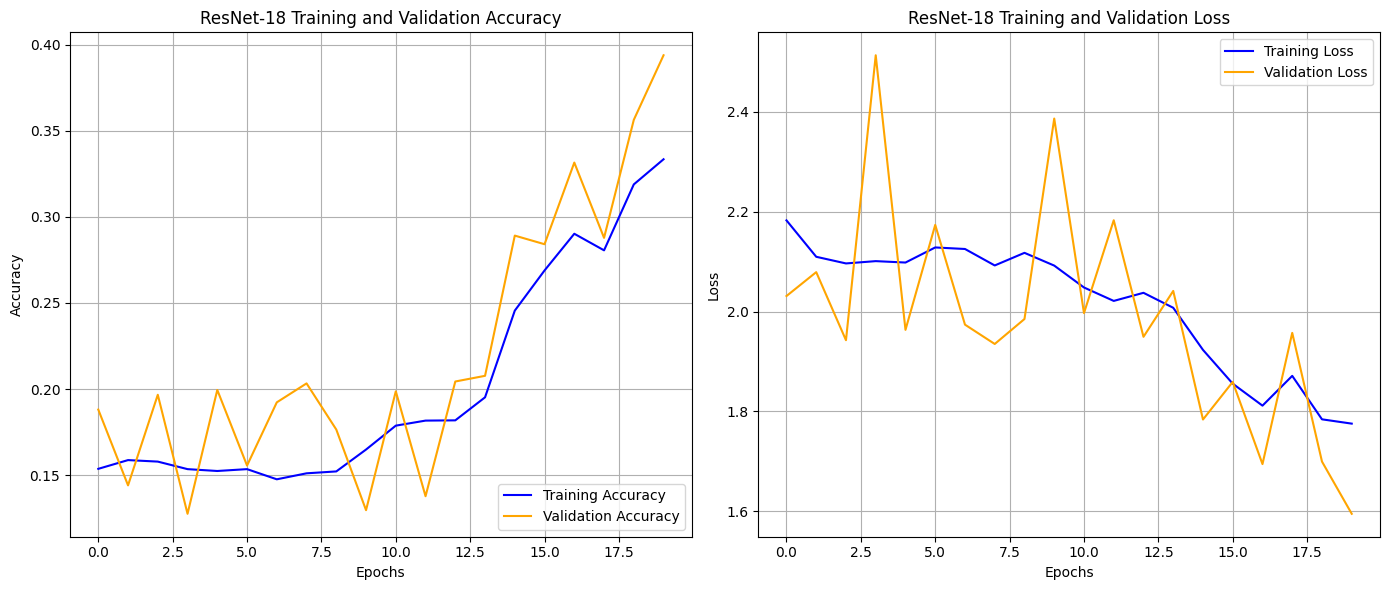

In [27]:
# Plot accuracy and loss for ResNet-18
plt.figure(figsize=(14, 6))

# Accuracy plot for ResNet-18
plt.subplot(1, 2, 1)
plt.plot(history_resnet18.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_resnet18.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('ResNet-18 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss plot for ResNet-18
plt.subplot(1, 2, 2)
plt.plot(history_resnet18.history['loss'], label='Training Loss', color='blue')
plt.plot(history_resnet18.history['val_loss'], label='Validation Loss', color='orange')
plt.title('ResNet-18 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.savefig('resnet18_training_validation_plots.png')  # Save plot as PNG
plt.show()


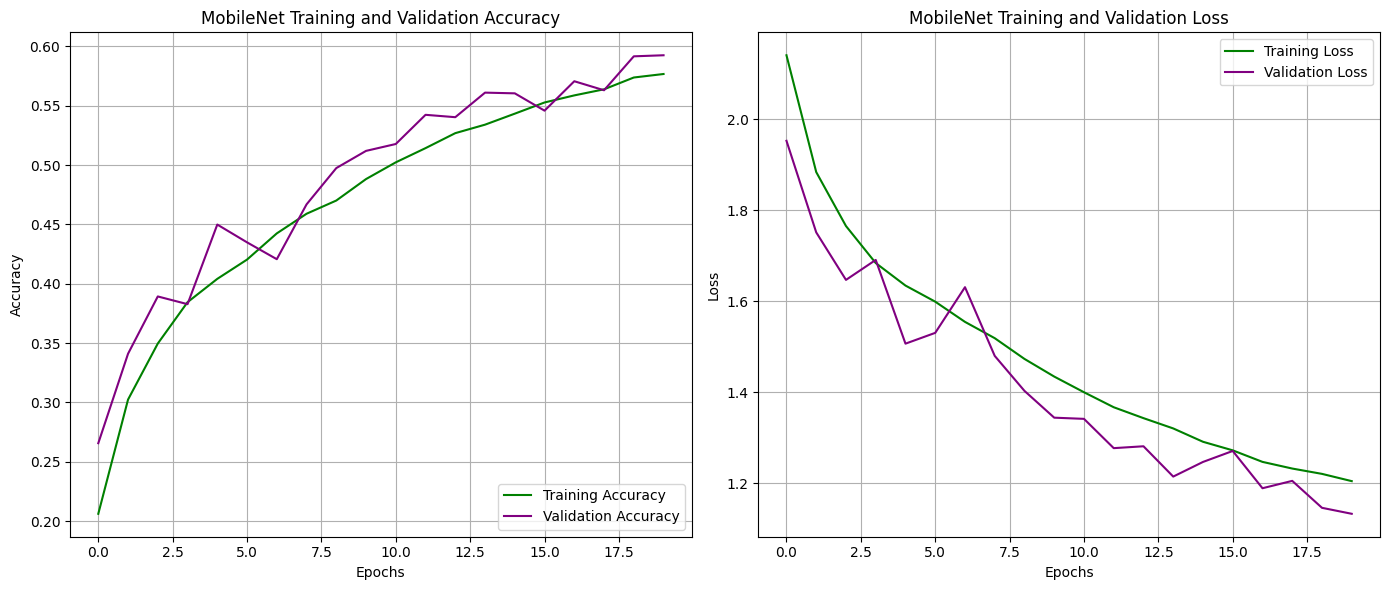

In [28]:
# Plot accuracy and loss for MobileNet
plt.figure(figsize=(14, 6))

# Accuracy plot for MobileNet
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy', color='purple')
plt.title('MobileNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss plot for MobileNet
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss', color='green')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss', color='purple')
plt.title('MobileNet Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.savefig('mobilenet_training_validation_plots.png')  # Save plot as PNG
plt.show()
